# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [ ]:
# 掛載google driver
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Unit02/data/grades.csv')
print(df)

     姓名  國文  英文  數學  自然  社會
0   劉俊安   9  10  15  10  13
1   胡玉華  10  10  10   8   9
2   黃淑婷  13  15   8  11  14
3   陳上紫  10  10   8   9  14
4   崔靜成  13  12  14  12  13
..  ...  ..  ..  ..  ..  ..
95  蔡佳燕   9  10   9  13  14
96  吳筱婷   8  10  14  10  15
97  陳家銘  14   9  11   8  12
98  李明威  15   9   8   9  15
99  農揚勇   9  11  12  12  10

[100 rows x 6 columns]


用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [ ]:
df['國文']

,國文
0,9
1,10
2,13
3,10
4,13
...,...
95,9
96,8
97,14
98,15


在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [ ]:
df.國文

,國文
0,9
1,10
2,13
3,10
4,13
...,...
95,9
96,8
97,14
98,15


#### 資料畫出來

要畫個圖很容易。

<Axes: >

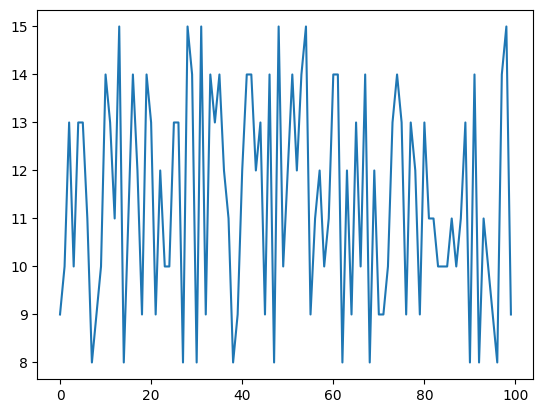

In [ ]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

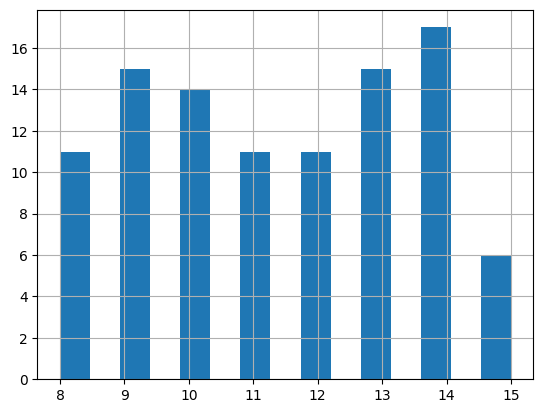

In [ ]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [ ]:
print(df.國文.mean())

11.39


算標準差。

In [ ]:
print(df.國文.std())

2.1968526614594834


不如就該算的都幫我們算算...

In [ ]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [ ]:
df2 = df.iloc[:,1:6]
print(df2.corr())

          國文        英文        數學        自然        社會
國文  1.000000  0.160158 -0.310899 -0.110236 -0.028421
英文  0.160158  1.000000  0.025656  0.113929 -0.063512
數學 -0.310899  0.025656  1.000000  0.014371  0.041651
自然 -0.110236  0.113929  0.014371  1.000000 -0.156594
社會 -0.028421 -0.063512  0.041651 -0.156594  1.000000


只算兩科間的相關係數當然也可以。

In [ ]:
print(df2.國文.corr(df2.數學))

-0.3108989822179331


## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [ ]:
df["總級分"] = df2.sum(axis=1)
print(df)

     姓名  國文  英文  數學  自然  社會  總級分
0   劉俊安   9  10  15  10  13   57
1   胡玉華  10  10  10   8   9   47
2   黃淑婷  13  15   8  11  14   61
3   陳上紫  10  10   8   9  14   51
4   崔靜成  13  12  14  12  13   64
..  ...  ..  ..  ..  ..  ..  ...
95  蔡佳燕   9  10   9  13  14   55
96  吳筱婷   8  10  14  10  15   57
97  陳家銘  14   9  11   8  12   54
98  李明威  15   9   8   9  15   56
99  農揚勇   9  11  12  12  10   54

[100 rows x 7 columns]


### 【技巧】

有計算的當然也可以的。

In [ ]:
df['加權']=df.國文+df.英文+df.數學*2+df.社會+df.自然
print(df)

     姓名  國文  英文  數學  自然  社會  總級分  加權
0   劉俊安   9  10  15  10  13   57  72
1   胡玉華  10  10  10   8   9   47  57
2   黃淑婷  13  15   8  11  14   61  69
3   陳上紫  10  10   8   9  14   51  59
4   崔靜成  13  12  14  12  13   64  78
..  ...  ..  ..  ..  ..  ..  ...  ..
95  蔡佳燕   9  10   9  13  14   55  64
96  吳筱婷   8  10  14  10  15   57  71
97  陳家銘  14   9  11   8  12   54  65
98  李明威  15   9   8   9  15   56  64
99  農揚勇   9  11  12  12  10   54  66

[100 rows x 8 columns]


In [ ]:
df.sort_values(by='總級分',ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
12,李正偉,11,15,11,14,15,66,77
80,施雅鈴,13,15,12,13,13,66,78
37,曾怡君,11,12,15,13,14,65,80
25,蔡亦瑄,13,13,14,13,12,65,79
54,陳怡潔,15,15,9,15,11,65,74
83,李士賢,10,14,15,13,13,65,80
87,趙偉希,10,13,14,13,15,65,79
64,俞志峰,9,14,13,14,15,65,78
48,陳怡婷,15,14,12,9,15,65,77
57,胡淳茜,12,15,14,13,11,65,79


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [ ]:
df.sort_values(by='總級分',ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
12,李正偉,11,15,11,14,15,66,77
80,施雅鈴,13,15,12,13,13,66,78
37,曾怡君,11,12,15,13,14,65,80
25,蔡亦瑄,13,13,14,13,12,65,79
54,陳怡潔,15,15,9,15,11,65,74
83,李士賢,10,14,15,13,13,65,80
87,趙偉希,10,13,14,13,15,65,79
64,俞志峰,9,14,13,14,15,65,78
48,陳怡婷,15,14,12,9,15,65,77
57,胡淳茜,12,15,14,13,11,65,79


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [ ]:
df3 = df.sort_values(by=['加權','總級分'],ascending=False)

### 【重點】重設 index

In [ ]:
df3.head()
df3.index = range(1,101)
df3.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,曾怡君,11,12,15,13,14,65,80
2,李士賢,10,14,15,13,13,65,80
3,蔡亦瑄,13,13,14,13,12,65,79
4,胡淳茜,12,15,14,13,11,65,79
5,趙偉希,10,13,14,13,15,65,79


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [ ]:
print(df3[df3['數學']==15])


     姓名  國文  英文  數學  自然  社會  總級分  加權
1   曾怡君  11  12  15  13  14   65  80
2   李士賢  10  14  15  13  13   65  80
6   詹威德  12  13  15  10  14   64  79
14  林哲法  14   9  15  10  14   62  77
15  陳竹伯  10  12  15  10  14   61  76
16  周育霖   9  12  15  13  12   61  76
21  段冠廷   9   8  15  12  15   59  74
22  葉儀依   9  13  15   8  14   59  74
23  吳志遠  13  15  15   8   8   59  74
24  胡勝傑   8  11  15  10  15   59  74
28  劉俊安   9  10  15  10  13   57  72
38  張雅彬  10  11  15  12   8   56  71
55  芮秋辛  11  10  15  10   8   54  69


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [ ]:
print(df3[(df3['數學']==15)&(df3['英文']==15)])

     姓名  國文  英文  數學  自然  社會  總級分  加權
23  吳志遠  13  15  15   8   8   59  74


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [ ]:
df3.drop('總級分',axis=1)

,姓名,國文,英文,數學,自然,社會,加權
1,曾怡君,11,12,15,13,14,80
2,李士賢,10,14,15,13,13,80
3,蔡亦瑄,13,13,14,13,12,79
4,胡淳茜,12,15,14,13,11,79
5,趙偉希,10,13,14,13,15,79
...,...,...,...,...,...,...,...
96,李曼夢,11,9,11,8,8,58
97,胡玉華,10,10,10,8,9,57
98,林建亨,9,11,8,8,11,55
99,林金鳳,8,9,10,10,8,55


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [ ]:
df3.drop("總級分",inplace=True,axis=1)

In [ ]:
print(df3)

      姓名  國文  英文  數學  自然  社會  加權
1    曾怡君  11  12  15  13  14  80
2    李士賢  10  14  15  13  13  80
3    蔡亦瑄  13  13  14  13  12  79
4    胡淳茜  12  15  14  13  11  79
5    趙偉希  10  13  14  13  15  79
..   ...  ..  ..  ..  ..  ..  ..
96   李曼夢  11   9  11   8   8  58
97   胡玉華  10  10  10   8   9  57
98   林建亨   9  11   8   8  11  55
99   林金鳳   8   9  10  10   8  55
100  梁慧君   9   8   8   8  12  53

[100 rows x 7 columns]


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [ ]:
df3.drop(5).head(10)

,姓名,國文,英文,數學,自然,社會,加權
1,曾怡君,11,12,15,13,14,80
2,李士賢,10,14,15,13,13,80
3,蔡亦瑄,13,13,14,13,12,79
4,胡淳茜,12,15,14,13,11,79
6,詹威德,12,13,15,10,14,79
7,施雅鈴,13,15,12,13,13,78
8,俞志峰,9,14,13,14,15,78
9,崔靜成,13,12,14,12,13,78
10,劉麗芬,8,14,14,14,14,78
11,李正偉,11,15,11,14,15,77


In [ ]:
df3[df3.姓名=="李士賢"]

,姓名,國文,英文,數學,自然,社會,加權
2,李士賢,10,14,15,13,13,80


In [ ]:
df3.drop(df3[df3.姓名=="李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權
1,曾怡君,11,12,15,13,14,80
3,蔡亦瑄,13,13,14,13,12,79
4,胡淳茜,12,15,14,13,11,79
5,趙偉希,10,13,14,13,15,79
6,詹威德,12,13,15,10,14,79
...,...,...,...,...,...,...,...
96,李曼夢,11,9,11,8,8,58
97,胡玉華,10,10,10,8,9,57
98,林建亨,9,11,8,8,11,55
99,林金鳳,8,9,10,10,8,55


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [ ]:
!pip install yfinance --upgrade

In [ ]:
import yfinance as yf
df = yf.download("AAPL", period="2y")

'''
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')
'''

/tmp/ipython-input-3083858365.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", period="2y")
[*********************100%***********************]  1 of 1 completed


"\nimport pandas_datareader as pdr\ndf = pdr.get_data_yahoo('AAPL')\n"

In [ ]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-11-27,188.014389,188.886161,187.132716,188.143178,40552600
2023-11-28,188.618683,189.292329,187.628038,188.004488,38415400
2023-11-29,187.598343,190.292897,187.202091,189.114028,43014200
2023-11-30,188.172897,188.539446,186.429369,188.063926,48794400
2023-12-01,189.450836,189.767835,187.459631,188.549346,45704800


#### 只要最後 300 個交易日!

In [ ]:
df = df[-300:]
print(df)

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2024-09-18  219.454926  221.463625  216.322545  216.332499   59894900
2024-09-19  227.589142  228.533837  223.372880  223.730866   66781300
2024-09-20  226.922897  231.785530  226.346141  228.682996  318679900
2024-09-23  225.202591  228.165910  224.546281  226.067717   54146000
2024-09-24  226.097534  228.066464  224.466713  227.370370   43556100
...                ...         ...         ...         ...        ...
2025-11-20  266.250000  275.429993  265.920013  270.829987   45823600
2025-11-21  271.489990  273.329987  265.670013  265.950012   59030800
2025-11-24  275.920013  277.000000  270.899994  270.899994   65585800
2025-11-25  276.970001  280.380005  275.250000  275.269989   46914200
2025-11-26  277.549988  279.529999  276.630005  276.959991   33413600

[300 rows x 5 colum

#### 20 日的移動平均

<Axes: xlabel='Date'>

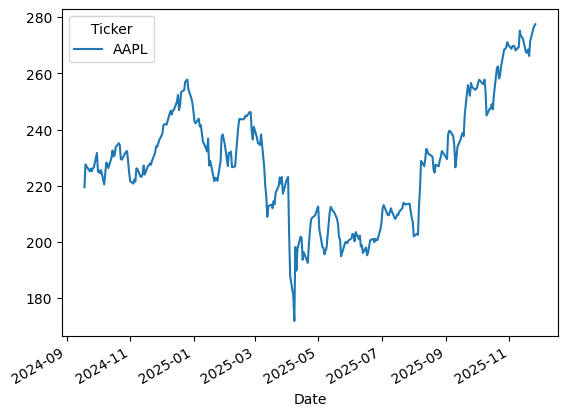

In [ ]:
df.Close.plot()


<Axes: xlabel='Date'>

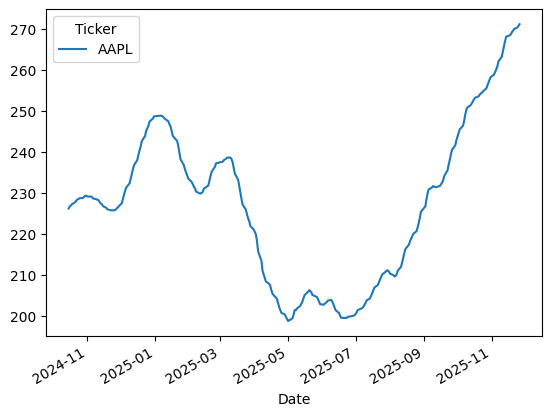

In [ ]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

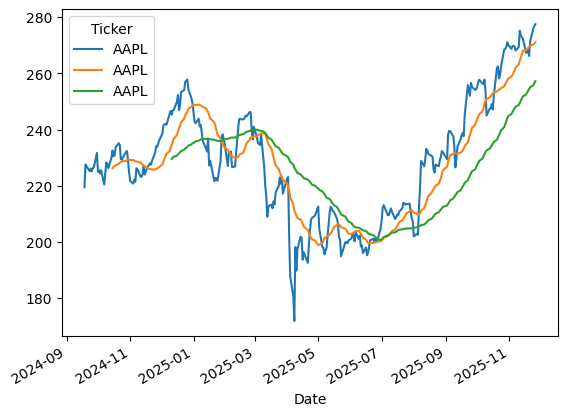

In [ ]:
ax = df['Close'].plot(label='Close', legend=True)
df['Close'].rolling(20).mean().plot(ax=ax, label=r"$MA_{20}$", legend=True)
df['Close'].rolling(60).mean().plot(ax=ax, label=r"$MA_{60}$", legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [ ]:
close = df.Close.values
print(len(close))

300


In [ ]:
x = close[:-1]
print(len(x))

299


In [ ]:
y = close[1:]
print(len(y))

299


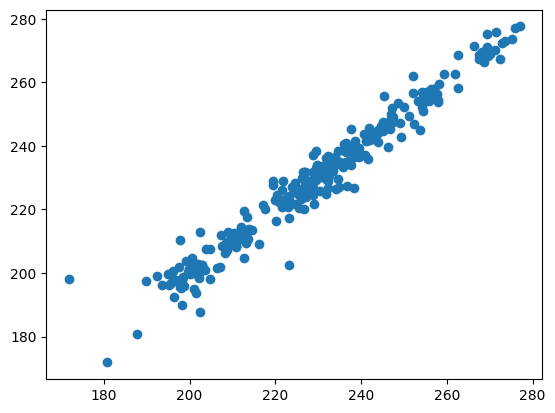

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [ ]:
import numpy as np
mydata = np.random.randn(4,3)

In [ ]:
print(mydata)

[[-0.58914875 -0.26740746 -1.18496077]
 [-1.07403277 -0.6566818   0.69702367]
 [-0.36569055 -0.79335065  0.46436813]
 [ 0.03305382 -0.59682479 -0.75577009]]


把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [ ]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [ ]:
print(df2)

          A         B         C
0 -0.589149 -0.267407 -1.184961
1 -1.074033 -0.656682  0.697024
2 -0.365691 -0.793351  0.464368
3  0.033054 -0.596825 -0.755770


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [ ]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [ ]:
print(df3)

          A         B         C
0  0.535188 -0.781527  0.390179
1 -0.211098  2.201950 -1.123517
2  1.546027 -0.412721 -0.327193


In [ ]:
df4 = pd.concat([df2,df3],axis=0)

In [ ]:
print(df4)

          A         B         C
0 -0.589149 -0.267407 -1.184961
1 -1.074033 -0.656682  0.697024
2 -0.365691 -0.793351  0.464368
3  0.033054 -0.596825 -0.755770
0  0.535188 -0.781527  0.390179
1 -0.211098  2.201950 -1.123517
2  1.546027 -0.412721 -0.327193


前面我們弄得亂七八糟的 index 重設一下。

In [ ]:
df4.index = range(7)

In [ ]:
print(df4)

          A         B         C
0 -0.589149 -0.267407 -1.184961
1 -1.074033 -0.656682  0.697024
2 -0.365691 -0.793351  0.464368
3  0.033054 -0.596825 -0.755770
4  0.535188 -0.781527  0.390179
5 -0.211098  2.201950 -1.123517
6  1.546027 -0.412721 -0.327193


#### 横向的貼

In [ ]:
df5 = pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [ ]:
print(df5)

          A         B         C         A         B         C
0 -0.589149 -0.267407 -1.184961  0.535188 -0.781527  0.390179
1 -1.074033 -0.656682  0.697024 -0.211098  2.201950 -1.123517
2 -0.365691 -0.793351  0.464368  1.546027 -0.412721 -0.327193
3  0.033054 -0.596825 -0.755770       NaN       NaN       NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [ ]:
df_names = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Unit02/data/names.csv',names=['姓名'])

In [ ]:
print(df_names)

     姓名
0   羅雅慧
1   王紹尹
2   黃季坤
3   許正書
4   張鈞蓮
..  ...
95  陳君生
96  曾桂甫
97  林欣怡
98  林佳霖
99  胡筱芸

[100 rows x 1 columns]


In [ ]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [ ]:
print(df_grades)

    國文  英文  數學  社會  自然
0   15  14   7  15   7
1   14   7  14   9  12
2   11   6  12  10   6
3   11   8  12  12  10
4   12   7  10  11   9
..  ..  ..  ..  ..  ..
95   7   8  11   9  11
96  13  11   6  14   8
97   8  15  14  10   6
98  15  15  15   9  13
99  10  13  12   9   9

[100 rows x 5 columns]


In [ ]:
df_grades.to_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Unit02/data/grade2.csv',index=0)
df2_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Unit02/data/grade2.csv')
print(df2_)

    國文  英文  數學  社會  自然
0   15  14   7  15   7
1   14   7  14   9  12
2   11   6  12  10   6
3   11   8  12  12  10
4   12   7  10  11   9
..  ..  ..  ..  ..  ..
95   7   8  11   9  11
96  13  11   6  14   8
97   8  15  14  10   6
98  15  15  15   9  13
99  10  13  12   9   9

[100 rows x 5 columns]


In [ ]:
df_score = pd.concat([df_names,df2_],axis=1)
print(df_score)

     姓名  國文  英文  數學  社會  自然
0   羅雅慧  15  14   7  15   7
1   王紹尹  14   7  14   9  12
2   黃季坤  11   6  12  10   6
3   許正書  11   8  12  12  10
4   張鈞蓮  12   7  10  11   9
..  ...  ..  ..  ..  ..  ..
95  陳君生   7   8  11   9  11
96  曾桂甫  13  11   6  14   8
97  林欣怡   8  15  14  10   6
98  林佳霖  15  15  15   9  13
99  胡筱芸  10  13  12   9   9

[100 rows x 6 columns]


,姓名,Unnamed: 0,國文,英文,數學,社會,自然
0,羅雅慧,0,12,6,6,8,12
1,王紹尹,1,10,6,13,13,6
2,黃季坤,2,11,14,13,13,11
3,許正書,3,10,13,13,14,12
4,張鈞蓮,4,8,13,14,9,13
...,...,...,...,...,...,...,...
95,陳君生,95,11,9,13,14,10
96,曾桂甫,96,14,9,12,11,9
97,林欣怡,97,15,8,13,14,14
98,林佳霖,98,8,11,9,7,10
